In [18]:
import math
import numpy as np
import h5py
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.python.framework import ops
%run lib/cleandata.py
%run lib/dnn_utils_v2.py
%matplotlib inline

In [19]:
def create_placeholders(n_x, n_y):
    
    X = tf.placeholder(tf.float32, shape=(n_x, None))
    Y = tf.placeholder(tf.float32, shape=(n_y, None))
    
    return X, Y

In [20]:
def initialize_parameters():
        
    W1 = tf.get_variable("W1", [50,8], initializer = tf.contrib.layers.xavier_initializer(seed = 1))
    b1 = tf.get_variable("b1", [50,1], initializer = tf.zeros_initializer())
    W2 = tf.get_variable("W2", [35, 50], initializer = tf.contrib.layers.xavier_initializer(seed = 1))
    b2 = tf.get_variable("b2", [35, 1], initializer = tf.zeros_initializer())
    W3 = tf.get_variable("W3", [1, 35], initializer = tf.contrib.layers.xavier_initializer(seed = 1))
    b3 = tf.get_variable("b3", [1,1], initializer = tf.zeros_initializer())

    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2,
                  "W3": W3,
                  "b3": b3}
    
    return parameters

In [21]:
def forward_propagation(X, parameters):
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    W3 = parameters['W3']
    b3 = parameters['b3']
    
    Z1 = tf.add(tf.matmul(W1, X), b1)                                             
    A1 = tf.nn.relu(Z1)                                             
    Z2 = tf.add(tf.matmul(W2, A1), b2)                                           
    A2 = tf.nn.relu(Z2)                                            
    Z3 = tf.add(tf.matmul(W3, A2), b3)                                           
    
    return Z3

In [22]:
def compute_cost(Z3, Y):
    logits = tf.transpose(Z3)
    labels = tf.transpose(Y)
    
    cost = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits = logits, labels = labels))
    
    return cost

In [23]:
def model(X_train, Y_train, X_test, learning_rate = 0.0001,
          num_epochs = 1500, minibatch_size = 32, print_cost = True):
    
    ops.reset_default_graph()                         
    (n_x, m) = X_train.shape                         
    n_y = Y_train.shape[0]                           
    costs = []                                     
    
    X, Y = create_placeholders(n_x, n_y)
    parameters = initialize_parameters()
    Z3 = forward_propagation(X, parameters)
    cost = compute_cost(Z3, Y)
    optimizer = tf.train.AdamOptimizer(learning_rate = learning_rate).minimize(cost)
    init = tf.global_variables_initializer()
    with tf.Session() as sess:
        
        sess.run(init)
        
        for epoch in range(num_epochs):

            _ , epoch_cost = sess.run([optimizer, cost], feed_dict = {X:X_train, Y:Y_train})
            
            if print_cost == True and epoch % 100 == 0:
                print ("Cost after epoch %i: %f" % (epoch, epoch_cost))
            if print_cost == True and epoch % 5 == 0:
                costs.append(epoch_cost)
                
        plt.plot(np.squeeze(costs))
        plt.ylabel('cost')
        plt.xlabel('iterations (per tens)')
        plt.title("Learning rate =" + str(learning_rate))
        plt.show()

        parameters = sess.run(parameters)
        print ("Parameters have been trained!")

        
        correct_prediction = tf.equal(tf.round(Z3), tf.round(Y))
        accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))

        
        return parameters

In [24]:
train,test = clean()

(891, 9) (418, 9)


In [25]:
X_train = train[1:,:]
Y_train = train[:1,:]

In [26]:
Y_train2 = np.subtract(np.zeros(Y_train.shape)+1,Y_train.astype(float))

In [27]:
X_test = test[1:,:]

In [28]:
print(X_test.shape)

(8, 418)


Cost after epoch 0: 1.183220
Cost after epoch 100: 0.655480
Cost after epoch 200: 0.552865
Cost after epoch 300: 0.508811
Cost after epoch 400: 0.480598
Cost after epoch 500: 0.462102
Cost after epoch 600: 0.449439
Cost after epoch 700: 0.439936
Cost after epoch 800: 0.432076
Cost after epoch 900: 0.425063
Cost after epoch 1000: 0.419262
Cost after epoch 1100: 0.414582
Cost after epoch 1200: 0.410474
Cost after epoch 1300: 0.406277
Cost after epoch 1400: 0.401987
Cost after epoch 1500: 0.398216
Cost after epoch 1600: 0.394824
Cost after epoch 1700: 0.391976
Cost after epoch 1800: 0.389241
Cost after epoch 1900: 0.386788
Cost after epoch 2000: 0.384463
Cost after epoch 2100: 0.382344
Cost after epoch 2200: 0.380369
Cost after epoch 2300: 0.378437
Cost after epoch 2400: 0.376528
Cost after epoch 2500: 0.374583
Cost after epoch 2600: 0.372753
Cost after epoch 2700: 0.370992
Cost after epoch 2800: 0.369220
Cost after epoch 2900: 0.367494
Cost after epoch 3000: 0.365810
Cost after epoch 310

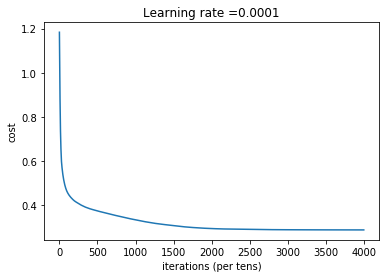

Parameters have been trained!


In [29]:
parameters = model(X_train, Y_train2, X_test, num_epochs = 20000, learning_rate=0.0001)

In [30]:
def linear_forward(A, W, b):
    
    Z = np.dot(W, A.astype(float)) + b
    
    assert(Z.shape == (W.shape[0], A.shape[1]))
    cache = (A, W, b)
    
    return Z, cache
  
def linear_activation_forward(A_prev, W, b, activation):
    
    if activation == "sigmoid":
        Z, linear_cache = linear_forward(A_prev, W, b)
        A, activation_cache = sigmoid(Z)
    
    elif activation == "relu":
        Z, linear_cache = linear_forward(A_prev, W, b)
        A, activation_cache = relu(Z)
    
    assert (A.shape == (W.shape[0], A_prev.shape[1]))
    cache = (linear_cache, activation_cache)

    return A, cache
  
def L_model_forward(X, parameters):
    
    caches = []
    A = X
    L = len(parameters) // 2                
    
    for l in range(1, L):
        A_prev = A 
        A, cache = linear_activation_forward(A_prev, parameters['W' + str(l)], parameters['b' + str(l)], "relu")
        caches.append(cache)
        
    AL, cache = linear_activation_forward(A, parameters['W' + str(L)], parameters['b' + str(L)], "sigmoid")
    caches.append(cache)
    
    assert(AL.shape == (1,X.shape[1]))
            
    return AL, caches
  
def predictFunc(X, y, parameters):
    m = X.shape[1]
    n = len(parameters) // 2 
    p = np.zeros((1,m))
    
    probas, caches = L_model_forward(X, parameters)
    
    for i in range(0, probas.shape[1]):
        if probas[0,i] < 0.5:
            p[0,i] = 1
        else:
            p[0,i] = 0
    
    print("Accuracy: "  + str(np.sum((p == y)/m)))
        
    return p

In [31]:
predictions_train = predictFunc(X_train.astype(float), Y_train.astype(float), parameters)

Accuracy: 0.867564534231


In [32]:
def predictTest(X, parameters):
    m = 1309-892+1
    n = len(parameters)//2
    p = np.zeros((1,m))
    probas, caches = L_model_forward(X[1:,:], parameters)
    
    for i in range(0, probas.shape[1]):
        if probas[0,i] < 0.5:
            p[0,i] = 1
        else:
            p[0,i] = 0
    return p
            
    
    

In [33]:
predictionTest = predictTest(test, parameters)

In [34]:
print(predictionTest.shape)

(1, 418)


In [35]:
import csv
with open('submission.csv', 'w') as csvfile:
    spamwriter = csv.writer(csvfile, delimiter=',')
    spamwriter.writerow(['PassengerId', 'Survived'])
    for i in range(892, 1310): 
        spamwriter.writerow([str(i), str(int(predictionTest[0][i-892]))])